Useful Links: <br>
[Why Data Science Dominates Fantasy Football](https://builtin.com/data-science/data-analytics-fantasy-football) <br>
[Fantasy Data Pros Repo](https://github.com/fantasydatapros/data) <br>
[Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet)

Notes: <br>
What is our central objective? Probably to predict player performance week-by-week<br>
We have data on: 
- yearly/weekly performance
- strength of schedule
- snap counts per player
- NFL combine performance
- Defense rankings (yearly aggregate)
- Expert consensus rankings (ECR)

## Introduction
The National Football League was founded in 1920 as a means to standardize the rules and regulations of the sport and elevate the game from a schoolyard pastime to a national business. By the mid-1960s, football was the most popular sport in America. The advent of cable television brought the sport into every home in America. Since then, millions have enjoyed watching their favorite teams compete every Sunday. <br>
Fantasy football arose as a natural outcome to the rise of the role of data in professional sports. In its most basic form, fantasy football is a game which tracks stats of every NFL player each week and awards points based on how well a player performs, with metrics including number of receptions, passing, receiving, and rushing yards, and number of touchdowns. A typical fantasy football league starts with a draft in which league members pick from a list of all NFL players, ranked based on their projected stats for the upcoming season. From these players, they create a lineup each week of 1 quarterback (QB), 2 running backs (RB), 2 wide receivers (WR), 1 tight end (TE), 1 flex player (RB, WR, or TE), 1 defense (D/ST), and 1 kicker (K). Each week, members put their lineups to the test by going head to head with others in their league to score the most points. League members can try to improve their team throughout the season by adding available players who have not been claimed by other teams or orchestrating trades with other league members.<br>
Thus, to succeed in fantasy football, we need to be able to accurately predict which players will perform the best not only each week, but throughout the entire season. The data itself is available to everyone; the key to success is taking the data and determining which parts are meaningful and which are not. In this data science tutorial, we will discuss in detail the process which data scientists take to answer questions such as these.

## Objectives
Our main objectives are twofold:
- Be able to predict which players will provide the most value at the beginning of the season
- Predict which players will perform the best week to week.

## Part 1: Data Collection
Our first step after identifying a subject and question to answer is to locate a publicly available data source (or make our own!). We will search with a few criteria in mind:
- Ensure number of data points is sufficient for statistical significance.
- Ensure that the dataset has enough features to create good predictive models.

First, we will import all the Python libraries which are helpful for data analysis and visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn import linear_model

import warnings
warnings.filterwarnings(action='ignore')

Next, we will load in our dataset(s).<br>
It's important to note that it is not always easy to find easily accessible CSV data when we are looking for a dataset. Sometimes, we will need to get our hands dirty and use techniques such as web scraping.

After searching the web, we found a great source for fantasy football data, hosted publicly on GitHub [here](https://github.com/fantasydatapros/data).

For the purposes of this project, we will analyze data from the 2019 and 2020 seasons and see if we can generate accurate predictions of player performance based on a number of metrics. 

Here we define a dictionary that associates each team name with its 3 letter abbreviation, which will make obtaining the data easier later on as well as make it easier to convert the data into a more uniform structure since we are pulling data from multiple sources.

In [3]:
# dictionary of team abbreviations
team_abrv_dict = {
    'Tampa Bay Buccaneers': 'TAM',
    'Carolina Panthers': 'CAR',
    'Atlanta Falcons': 'ATL',
    'New Orleans Saints': 'NOR',
    'Jacksonville Jaguars': 'JAX',
    'Indianapolis Colts': 'CLT',
    'San Francisco 49ers': 'SFO',
    'Tennessee Titans': 'OTI',
    'Minnesota Vikings': 'MIN',
    'Philadelphia Eagles': 'PHI',
    'Chicago Bears': 'CHI',
    'Los Angeles Chargers': 'SDG',
    'San Diego Chargers': 'SDG',
    'Dallas Cowboys': 'DAL',
    'New York Giants': 'NYG',
    'Green Bay Packers': 'GNB',
    'Detroit Lions': 'DET',
    'Denver Broncos': 'DEN',
    'New England Patriots': 'NWE',
    'Los Angeles Rams': 'RAM',
    'St. Louis Rams': 'RAM',
    'Arizona Cardinals': 'CRD',
    'Seattle Seahawks': 'SEA',
    'Oakland Raiders': 'RAI',
    'Las Vegas Raiders': 'RAI',
    'Houston Texans': 'HTX',
    'Washington Redskins': 'WAS',
    'Washington Football Team': 'WAS',
    'Baltimore Ravens': 'RAV',
    'Buffalo Bills': 'BUF',
    'Kansas City Chiefs': 'KAN',
    'New York Jets': 'NYJ',
    'Pittsburgh Steelers': 'PIT',
    'Cincinnati Bengals': 'CIN',
    'Cleveland Browns': 'CLE', 
    'Miami Dolphins': 'MIA'
}
team_abrv_list = [
  'BUF', 'MIA', 'NWE', 'NYJ',
  'RAV', 'PIT', 'CLE', 'CIN',
  'OTI', 'CLT', 'HTX', 'JAX',
  'KAN', 'RAI', 'SDG',  'DEN',
  'WAS', 'NYG', 'DAL', 'PHI',
  'GNB', 'CHI', 'DET', 'MIN',
  'NOR', 'TAM', 'CAR', 'ATL',
  'CRD', 'SFO', 'SEA', 'RAM'
]

Below we will define several functions which extract data either directly from the Github repo or from the website https://www.pro-football-reference.com/.

In [4]:
def get_yearly_data(year: int) -> pd.DataFrame:
  #Input: Desired NFL season (int)
  #Returns:  Player data from desired season (pd.DataFrame)
  if 1970 <= year <= 2020:
    url = (
        'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/'
        + str(year)
        + '.csv'
    )
    df = pd.read_csv(url)
    # cleaning data since the initials for some of the teams are different 
    # over the years or in the different datasets that we use
    df.Tm[df.Tm == 'BAL'] = 'RAV'
    df.Tm[df.Tm == 'IND'] = 'CLT'
    df.Tm[df.Tm == 'TEN'] = 'OTI'
    df.Tm[df.Tm == 'OAK'] = 'RAI'
    df.Tm[df.Tm == 'LVR'] = 'RAI'
    df.Tm[df.Tm == 'STL'] = 'RAM'
    df.Tm[df.Tm == 'LAR'] = 'RAM'
    df.Tm[df.Tm == 'HOU'] = 'HTX'
    df.Tm[df.Tm == 'ARI'] = 'CRD'
    df.Tm[df.Tm == 'LAC'] = 'SDG'

    # don't include players that are not on a team
    # df = df.loc[df['Tm'].isin(team_abrv_list)]
    # only include players with one of the positions we are looking at
    # df = df.loc[(df['Pos'] == 'QB') |
                # (df['Pos'] == 'RB') |
                # (df['Pos'] == 'WR') |
                # (df['Pos'] == 'TE')]

    return df
  else:
    print('Year provided not in dataset; Please select a year between 1970-2020')
    return None

In [5]:
year_df = get_yearly_data(2020)
year_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,OTI,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [6]:
def get_sos_data(year: int) ->pd.DataFrame:
  if 1999 <= year <= 2019:
    url = (
        'https://raw.githubusercontent.com/fantasydatapros/data/master/sos/' 
        + str(year)
        + '.csv'
    )
    df = pd.read_csv(url)
    df = df.rename(columns={"Unnamed: 0": "Team"})
    return df
  else:
    print('Year provided not in dataset; Please select a year between 1999-2020')
    return None


In [7]:
sos_df = get_sos_data(2019)
sos_df.head()

,Team,OppPPRFantasyPointsAllowed,PPRSOSRank,OppStandardFantasyPointsAllowed,StandardSOSRank,OppHalfPPRFantasyPointsAllowed,HalfPPRSOSRank,OppRushingFantasyPointsAllowed,RushingSOSRank,OppPassingFantasyPointsAllowed,PassingSOSRank,OppPPRReceivingFantasyPointsAllowed,PPRReceivingSOSRank,OppHalfPPRReceivingFantasyPointsAllowed,HalfPPRReceivingSOSRank,OppStandardReceivingFantasyPointsAllowed,StandardReceivingSOSRank
0,Tampa Bay Buccaneers,22724.14,32.0,16884.14,32.0,19804.14,32.0,4193.2,32.0,3836.84,31.0,14694.1,30.0,11774.1,31.0,8854.1,31.0
1,Carolina Panthers,22410.24,31.0,16501.24,30.0,19455.74,31.0,3735.5,4.0,3855.64,32.0,14819.1,32.0,11864.6,32.0,8910.1,32.0
2,Atlanta Falcons,22364.40,30.0,16418.40,26.0,19391.40,28.0,3890.7,15.0,3764.20,29.0,14709.5,31.0,11736.5,30.0,8763.5,29.0
3,New Orleans Saints,22344.92,29.0,16448.92,29.0,19396.92,29.0,4047.3,25.0,3735.32,27.0,14562.3,28.0,11614.3,28.0,8666.3,27.0
4,Jacksonville Jaguars,22271.16,28.0,16448.16,28.0,19359.66,27.0,3842.7,8.0,3797.56,30.0,14630.9,29.0,11719.4,29.0,8807.9,30.0


In [8]:
def get_weekly_data(year: int, week: int) -> pd.DataFrame:
  #Input: Desired year (int)
  #Input: Desired week (int)
  #Returns: Player data from desired week and year (pd.DataFrame)
  if 1999 <= year <= 2020:
    if 1 <= week <= 17:
      # format url and read the data into a dataframe
      url = (
          'https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/'
          + str(year) 
          + '/week' 
          + str(week) 
          + '.csv'
      )
      df = pd.read_csv(url)

      # cleaning data since the initials for some of the teams are different 
      # over the years or in the different datasets that we use
      df.Tm[df.Tm == 'BAL'] = 'RAV'
      df.Tm[df.Tm == 'IND'] = 'CLT'
      df.Tm[df.Tm == 'TEN'] = 'OTI'
      df.Tm[df.Tm == 'OAK'] = 'RAI'
      df.Tm[df.Tm == 'STL'] = 'RAM'
      df.Tm[df.Tm == 'LAR'] = 'RAM'
      df.Tm[df.Tm == 'HOU'] = 'HTX'
      df.Tm[df.Tm == 'ARI'] = 'CRD'
      df.Tm[df.Tm == 'LAC'] = 'SDG'

      # only include players with one of the positions we are looking at
      df = df.loc[(df['Pos'] == 'QB') |
                  (df['Pos'] == 'RB') |
                  (df['Pos'] == 'WR') |
                  (df['Pos'] == 'TE')]
      # # don't include players that are not on a team
      df = df.loc[df['Tm'].isin(team_abrv_list)]

      # return the dataframe
      return df
    else:
      print('Week provided not in our dataset; Please select a week between 1-17')
      return None
  else:
    print('Year provided not in dataset; Please select a year between 1999-2020')
    return None

In [9]:
def get_weekly_data_by_year(year: int) -> pd.DataFrame:
  #Intput: Desired year (int)
  #Returns: Player data from desired year, grouped by week (pd.DataFrame)
  week_list = []
  for week in range(1, 18):
    weekly_df = get_weekly_data(year, week)
    weekly_df['Week'] = week
    week_list.append(weekly_df)
    
  return pd.concat(week_list)


In [10]:
weekly_df = get_weekly_data_by_year(2020)
weekly_df.head()

,Unnamed: 0,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,...,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,0.0,Demarcus Robinson,WR,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,6.0,20.0,0.0,0.0,5.0,2.0,3.5,1
1,1.0,Travis Kelce,TE,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,50.0,1.0,0.0,17.0,11.0,14.0,1
6,6.0,Clyde Edwards-Helaire,RB,KAN,0.0,0.0,0.0,0.0,0.0,25.0,...,1.0,0.0,0.0,0.0,0.0,0.0,19.8,19.8,19.8,1
15,15.0,Darrel Williams,RB,KAN,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,2.0,2.0,7.0,0.0,0.0,5.0,3.0,4.0,1
17,17.0,Darwin Thompson,RB,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [11]:
def get_schedule_data(year: int) -> pd.DataFrame:
  data_list = []
  # for each team grab format the url and scrape the table
  for team in team_abrv_list:
    # https://www.pro-football-reference.com/teams/rav/2020/gamelog/
    url = (
      'https://www.pro-football-reference.com/teams/'
      + str(team.lower())
      + '/'
      + str(year)
      +'/gamelog/'
    )
    
    # grab the desired html 
    sched_data_html = requests.get(url)
    table_list = pd.read_html(url)
    
    # grab the desired table and restructure the column names
    sched_df = table_list[0]
    col_dict = {
      'Unnamed: 0_level_0': '',
      'Unnamed: 7_level_0': ''
    }
    sched_df = sched_df.rename(columns=col_dict)
    sched_df.columns = sched_df.columns.to_flat_index().map(lambda x: x[0] + x[1])
    
    # keep only the columns that we are interested in
    opp_df = sched_df.loc[:, ['Week', 'Opp']]
    opp_df.loc[:, 'Team'] = team.upper()
    data_list.append(opp_df)
  
  return pd.concat(data_list)

In [12]:
sched_df = get_schedule_data(2020)
sched_df.head()

,Week,Opp,Team
0,1,New York Jets,BUF
1,2,Miami Dolphins,BUF
2,3,Los Angeles Rams,BUF
3,4,Las Vegas Raiders,BUF
4,5,Tennessee Titans,BUF


In [13]:
def get_defensive_stats(year: int) -> pd.DataFrame:
  # https://www.pro-football-reference.com/years/2020/opp.htm
  url = (
      "https://www.pro-football-reference.com/years/"
      + str(year)
      + "/opp.htm"
  )
  table_list = pd.read_html(url)
  def_df = table_list[0]
  col_dict = {
      'Unnamed: 0_level_0': 'Gen',
      'Unnamed: 1_level_0': 'Gen',
      'Unnamed: 2_level_0': 'Total',
      'Unnamed: 3_level_0': 'Total',
      'Unnamed: 4_level_0': 'Total',
      'Tot Yds & TO': 'Total',
      'Unnamed: 8_level_0': 'Total',
      'Unnamed: 9_level_0': 'Total',
      'Unnamed: 25_level_0': 'Total',
      'Unnamed: 26_level_0': 'Total',
      'Unnamed: 27_level_0': 'Total',
  }
  def_df = def_df.rename(columns=col_dict)
  def_df.columns = def_df.columns.to_flat_index().map(lambda x: x[0]+ ' ' + x[1])
  return def_df

In [14]:
def_df = get_defensive_stats(2020)
def_df.head()

,Gen Rk,Gen Tm,Total G,Total PA,Total Yds,Total Ply,Total Y/P,Total TO,Total FL,Total 1stD,...,Rushing Yds,Rushing TD,Rushing Y/A,Rushing 1stD,Penalties Pen,Penalties Yds,Penalties 1stPy,Total Sc%,Total TO%,Total EXP
0,1.0,Los Angeles Rams,16.0,296.0,4511.0,989.0,4.6,22.0,8.0,280.0,...,1460.0,12.0,3.8,91.0,78.0,582.0,19.0,27.9,12.0,85.89
1,2.0,Baltimore Ravens,16.0,303.0,5276.0,1017.0,5.2,22.0,12.0,347.0,...,1740.0,12.0,4.6,96.0,77.0,646.0,38.0,30.0,12.4,-17.69
2,3.0,Pittsburgh Steelers,16.0,312.0,4893.0,996.0,4.9,27.0,9.0,281.0,...,1783.0,13.0,4.3,94.0,103.0,980.0,24.0,29.3,13.8,33.24
3,4.0,Washington Football Team,16.0,329.0,4873.0,1004.0,4.9,23.0,7.0,289.0,...,1805.0,14.0,4.2,100.0,85.0,708.0,28.0,31.4,12.2,32.51
4,5.0,New Orleans Saints,16.0,337.0,4974.0,992.0,5.0,26.0,8.0,320.0,...,1502.0,11.0,3.9,85.0,64.0,517.0,50.0,34.7,13.1,-40.02


In [15]:
# PROBABLY UNESSICARY
def get_defensive_fantasy_stats_by_year_and_pos(year: int, position: str):
  # https://www.pro-football-reference.com/years/2018/fantasy-points-against-QB.htm
  url = (
      'https://www.pro-football-reference.com/years/'
      + str(year)
      +'/fantasy-points-against-'
      + position
      + '.htm'
  )
  table_list = pd.read_html(url)
  def_df = table_list[0]
  col_dict = {
      'Unnamed: 0_level_0': '',
      'Unnamed: 1_level_0': '',
      'Unnamed: 7_level_0': '',
      'Unnamed: 8_level_0': '',
      'Fantasy': '',
      'Fantasy per Game': 'Per Game '
  }
  def_df = def_df.rename(columns=col_dict)
  def_df.columns = def_df.columns.to_flat_index().map(lambda x: x[0] + x[1])
  drop_cols = [
      'DKPt',
      'FDPt',
      'Per Game DKPt',
      'Per Game FDPt'  
  ]
  def_df.drop(drop_cols, axis = 1, inplace=True)
  return def_df

In [16]:
# PROBABLY UNNESSICARY
def get_player_snapcount_by_year(year: int) -> pd.DataFrame:
  # only works for 2012 and above
  # https://www.pro-football-reference.com/teams/rav/2021-snap-counts.htm
  data_list = []
  # for each team grab format the url and scrape the table
  for team in team_abrv_list:
    # https://www.pro-football-reference.com/teams/rav/2021-snap-counts.htm
    url = (
      'https://www.pro-football-reference.com/teams/'
      + str(team.lower())
      +'/'
      + str(year)
      +'-snap-counts.htm'
    )
    
    # grab the desired html 
    sched_data_html = requests.get(url)
    table_list = pd.read_html(url)
    
    # grab the desired table and restructure the column names
    snap_df = table_list[0]
    col_dict = {
      'Unnamed: 0_level_0': '',
      'Off.': 'Off ',
      'Num': 'Snaps',
      'Unnamed: 1_level_0': '',
      'Unnamed: 8_level_0': '',
    }
    snap_df = snap_df.rename(columns=col_dict)
    snap_df.columns = snap_df.columns.to_flat_index().map(lambda x: x[0]+ x[1])
    drop_cols = [
                  'Def.Snaps', 
                  'Def.Pct', 
                  'STSnaps', 
                  'STPct',
                  'Unnamed: 8_level_1'
                  ]
    snap_df.drop(drop_cols, axis = 1, inplace=True)

    # add the team to the dataframe
    snap_df.loc[:, 'Team'] = team.upper()

    # replace certain names so the datasets metch up
    snap_df.Player[snap_df.Player == 'Gardner Minshew II'] = 'Gardner Minshew'
    snap_df.Player[snap_df.Player == 'Robert Griffin III'] = 'Robert Griffin'
    snap_df.Player[snap_df.Player == 'Odell Beckham Jr.'] = 'Odell Beckham'
    snap_df.Player[snap_df.Player == 'Ted Ginn Jr.'] = 'Ted Ginn'
    snap_df.Player[snap_df.Player == 'Steve Smith Sr.'] = 'Steve Smith'
    snap_df.Player[snap_df.Player == 'Ronald Jones II'] = 'Ronald Jones'
    snap_df.Player[snap_df.Player == 'Benny Snell Jr.'] = 'Benny Snell'
    snap_df.Player[snap_df.Player == 'Kerrith Whyte Jr'] = 'Kerrith Whyte'
    snap_df.Player[snap_df.Player == 'Cedrick Wilson Jr.'] = 'Cedrick Wilson'
    snap_df.Player[snap_df.Player == 'Stanley Morgan Jr.'] = 'Stanley Morgan'

    data_list.append(snap_df)
   
  return pd.concat(data_list)

In [17]:
snap_df = get_player_snapcount_by_year(2020)
snap_df.head()

,Player,Pos,Off Snaps,Off Pct,Team
0,Josh Allen,QB,1035,95.13%,BUF
1,Matt Barkley,QB,53,4.87%,BUF
2,Devin Singletary,RB,621,57.08%,BUF
3,Zack Moss,RB,403,37.04%,BUF
4,Antonio Williams,RB,28,2.57%,BUF


In [18]:
# MAYBE UNESSICARY
def get_snap_FDP(year: int) -> pd.DataFrame:
  url = (
      'https://raw.githubusercontent.com/fantasydatapros/data/master/snapcounts/'
      + str(year)
      + '.csv'
  )
  df = pd.read_csv(url)
  return df

In [19]:
def get_ADP_data() -> pd.DataFrame:
  url = ('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/STANDARD_ADP.csv')
  df = pd.read_csv(url)

  #Remove rows with NaNs (there are a few in this csv)
  df.dropna(axis=0,inplace=True)

  #Rename 'PLAYER' column to match standard format
  df.rename(columns={'PLAYER':'Player'},inplace=True)
  return df

In [20]:
def get_adp_by_year(year: int) -> pd.DataFrame:
  # data from https://fantasyfootballcalculator.com/adp/ppr/12-team/all/2020
  adp_df = pd.read_csv(str(year) + 'adp.csv')

  # replace certain team names so they match up with our other data frames
  adp_df.Team[adp_df.Team == 'BAL'] = 'RAV'
  adp_df.Team[adp_df.Team == 'IND'] = 'CLT'
  adp_df.Team[adp_df.Team == 'TEN'] = 'OTI'
  adp_df.Team[adp_df.Team == 'LV'] = 'RAI'
  adp_df.Team[adp_df.Team == 'GB'] = 'GNB'
  adp_df.Team[adp_df.Team == 'LAR'] = 'RAM'
  adp_df.Team[adp_df.Team == 'HOU'] = 'HTX'
  adp_df.Team[adp_df.Team == 'ARI'] = 'CRD'
  adp_df.Team[adp_df.Team == 'LAC'] = 'SDG'
  adp_df.Team[adp_df.Team == 'SF'] = 'SFO'
  adp_df.Team[adp_df.Team == 'KC'] = 'KAN'
  adp_df.Team[adp_df.Team == 'NO'] = 'NOR'
  adp_df.Team[adp_df.Team == 'NE'] = 'NWE'
  adp_df.Team[adp_df.Team == 'TB'] = 'TAM'

  # clean up data
  adp_df.rename(columns={'Name': 'Player'}, inplace=True)
  adp_df.drop(['Column1'], axis = 1, inplace=True)

  # don't include players that are not on a team
  adp_df = adp_df.loc[adp_df['Team'].isin(team_abrv_list)]
  # only include players in the posititions that we are interested in
  adp_df = adp_df.loc[(adp_df['Pos'] == 'QB') |
                (adp_df['Pos'] == 'RB') |
                (adp_df['Pos'] == 'WR') |
                (adp_df['Pos'] == 'TE')]
  return adp_df

In [23]:
adp_df = get_adp_by_year(2020)
adp_df.head()

,#,Pick,Player,Pos,Team,Overall,StdDev,High,Low,TimesDrafted
0,1,1.01,Christian McCaffrey,RB,CAR,1.2,0.5,1.01,1.04,936
1,2,1.03,Saquon Barkley,RB,NYG,2.5,0.7,1.01,1.06,960
2,3,1.03,Ezekiel Elliott,RB,DAL,3.4,1.6,1.01,1.11,521
3,4,1.05,Alvin Kamara,RB,NOR,4.9,1.3,1.01,1.12,960
4,5,1.06,Michael Thomas,WR,NOR,5.6,1.6,1.01,1.11,811


An example of the use of one of these functions is shown below. <br>
***Takeaway #1: Think about the most efficient ways to read in data! In Python, it can sometimes be helpful to write a function to do the heavy lifting!***

In addition to just knowing the strength of each team's scedule for that year it is helpful to know a team's for a given week. Since our current dataset doesn't provide that for us we had to do some webscraping to get that information. We decided to scrape the website https://www.pro-football-reference.com/ because they have a lot of helpful data that is provided nicely in tables so it is easy to scrape the data from these tables.

In [24]:
sched_2020_df = get_schedule_data(2020)
sched_2020_df

,Week,Opp,Team
0,1,New York Jets,BUF
1,2,Miami Dolphins,BUF
2,3,Los Angeles Rams,BUF
3,4,Las Vegas Raiders,BUF
4,5,Tennessee Titans,BUF
...,...,...,...
11,13,Arizona Cardinals,RAM
12,14,New England Patriots,RAM
13,15,New York Jets,RAM
14,16,Seattle Seahawks,RAM


Also from https://www.pro-football-reference.com/ we scraped data on each teams defensive performance for a given year.

In [25]:
defense_2020_df = get_defensive_stats(2020)
defense_2020_df

,Gen Rk,Gen Tm,Total G,Total PA,Total Yds,Total Ply,Total Y/P,Total TO,Total FL,Total 1stD,...,Rushing Yds,Rushing TD,Rushing Y/A,Rushing 1stD,Penalties Pen,Penalties Yds,Penalties 1stPy,Total Sc%,Total TO%,Total EXP
0,1.0,Los Angeles Rams,16.0,296.0,4511.0,989.0,4.6,22.0,8.0,280.0,...,1460.0,12.0,3.8,91.0,78.0,582.0,19.0,27.9,12.0,85.89
1,2.0,Baltimore Ravens,16.0,303.0,5276.0,1017.0,5.2,22.0,12.0,347.0,...,1740.0,12.0,4.6,96.0,77.0,646.0,38.0,30.0,12.4,-17.69
2,3.0,Pittsburgh Steelers,16.0,312.0,4893.0,996.0,4.9,27.0,9.0,281.0,...,1783.0,13.0,4.3,94.0,103.0,980.0,24.0,29.3,13.8,33.24
3,4.0,Washington Football Team,16.0,329.0,4873.0,1004.0,4.9,23.0,7.0,289.0,...,1805.0,14.0,4.2,100.0,85.0,708.0,28.0,31.4,12.2,32.51
4,5.0,New Orleans Saints,16.0,337.0,4974.0,992.0,5.0,26.0,8.0,320.0,...,1502.0,11.0,3.9,85.0,64.0,517.0,50.0,34.7,13.1,-40.02
5,6.0,Miami Dolphins,16.0,338.0,5886.0,998.0,5.9,29.0,11.0,336.0,...,1862.0,17.0,4.5,113.0,85.0,805.0,30.0,30.7,15.6,-36.43
6,7.0,New England Patriots,16.0,353.0,5660.0,982.0,5.8,22.0,4.0,339.0,...,2103.0,17.0,4.5,131.0,82.0,639.0,21.0,38.9,14.0,-113.10
7,8.0,Tampa Bay Buccaneers,16.0,355.0,5234.0,1023.0,5.1,25.0,10.0,319.0,...,1289.0,10.0,3.6,78.0,95.0,1015.0,26.0,33.7,14.0,-22.04
8,9.0,New York Giants,16.0,357.0,5589.0,1046.0,5.3,22.0,11.0,353.0,...,1782.0,14.0,4.1,115.0,88.0,681.0,23.0,41.5,12.2,-66.94
9,10.0,Indianapolis Colts,16.0,362.0,5314.0,992.0,5.4,25.0,10.0,329.0,...,1448.0,16.0,3.7,94.0,86.0,755.0,32.0,35.1,14.3,-75.62


## Part 2: Data Management and Representation

## Data Management and Representation mostly mixed in with part 1 should combine these sections


This stage of the data science pipeline is necessary to prepare the data and the way in which it is stored for further analysis. Think of this as the ***preprocessing*** step. In this step, we should try to look for a few things:
- Is there data which is clearly missing?
- Are there any labels in our dataset which can be considered extraneous or unnecessary?
- Is our data stored or represented in such a way that will allow for efficient analysis and visualization?

Let's answer the first question. Upon quick inspection of the player data we can see that more than half of the values are zero. Does this mean our data is bad? Not at all. This is a rather simple example of what a data scientist may find, but it is important to think about why data may be missing as it pertains to our particular dataset. After quick analysis it becomes obvious that there are certain labels which don't make sense for certain positions. For instance, what good is keeping track of passing attempts for a running back? A good first step would be to group the players by position and only maintain the labels which are relevant to that position. We should also remove the players with zero fantasy points for the season, as we are only interested in players who would be relevant to an individual's fantasy team. <br>

***Takeaway #2: Physically look through the data and think about the reasons why data may be missing or zero!***

In [26]:
#Remove players who scored zero fantasy points.
year_df = year_df.loc[(year_df['FantasyPoints'] > 0)]
#Group the "yearly" dataset by position and remove extraneous labels.

#Quarterbacks
QB_df = year_df.loc[(year_df['Pos'] == 'QB')]
QB_df.drop(['ReceivingYds','ReceivingTD'],axis=1,inplace=True)

#Running Backs
RB_df = year_df.loc[(year_df['Pos'] == 'RB')]
RB_df.drop(['PassingYds','PassingTD','PassingAtt','Int'],axis=1,inplace=True)

#Wide Receivers
WR_df = year_df.loc[(year_df['Pos'] == 'WR')]
WR_df.drop(['PassingYds','PassingTD','PassingAtt','Int','RushingYds','RushingTD','RushingAtt'],axis=1,inplace=True)

#Tight Ends
TE_df = year_df.loc[(year_df['Pos'] == 'TE')]
TE_df.drop(['PassingYds','PassingTD','PassingAtt','Int','RushingYds','RushingTD','RushingAtt'],axis=1,inplace=True)

Now we have a much better representation of offensive NFL player data based on their respective positions. Let's see if we can apply a similar reduction to the week-by-week data.

The best way to accomplish this would be to combine all of the weekly data into a single dataframe, grouped by week. This way, we can easily select which week we are interested in when we begin our analysis.

In [27]:
#Combine weekly data into single DataFrame
weekly_df = get_weekly_data_by_year(2020)

#Quarterbacks
QB_week_df = weekly_df.loc[(weekly_df['Pos'] == 'QB')]
QB_week_df.drop(['ReceivingYds','ReceivingTD','Rec','Tgt'],axis=1,inplace=True)

#Running Backs
RB_week_df = weekly_df.loc[(weekly_df['Pos'] == 'RB')]
RB_week_df.drop(['PassingYds','PassingTD','PassingAtt','Int'],axis=1,inplace=True)

#Wide Receivers
WR_week_df = weekly_df.loc[(weekly_df['Pos'] == 'WR')]
WR_week_df.drop(['PassingYds','PassingTD','PassingAtt','Int','RushingYds','RushingTD','RushingAtt'],axis=1,inplace=True)

#Tight Ends
TE_week_df = weekly_df.loc[(weekly_df['Pos'] == 'TE')]
TE_week_df.drop(['PassingYds','PassingTD','PassingAtt','Int','RushingYds','RushingTD','RushingAtt'],axis=1,inplace=True)

## Part 3: Exploratory Data Analysis

The importance of exploratory data analysis cannot be overstated. It is crucial that we as data scientists are able to visualize the data and identify certain initial trends, which may even present us with new questions to answer. Visualization is an important tool which we have at our disposal; it allows us to observe certain trends that we may not be able to discern simply from looking at the dataset (especially if the dataset in question is particularly large). In Python, we can use either the ***matplotlib*** or ***seaborn*** libraries for plotting the data 


We will begin with the Quarterback DataFrames which we generated previously. ***QB_df*** contains aggregate data from the entire 2020 season for every quarterback in the NFL, while ***QB_week_df*** contains week-by-week performance data for these quarterbacks.

In [28]:
QB_week_df

,Unnamed: 0,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
27,27.0,Patrick Mahomes,QB,KAN,211.0,3.0,0.0,32.0,24.0,0.0,0.0,0.0,0.0,20.44,20.44,20.44,1
72,72.0,Deshaun Watson,QB,HTX,253.0,1.0,1.0,32.0,20.0,6.0,27.0,1.0,0.0,20.82,20.82,20.82,1
85,85.0,Matt Ryan,QB,ATL,450.0,2.0,1.0,54.0,37.0,1.0,-1.0,0.0,0.0,23.90,23.90,23.90,1
173,173.0,Russell Wilson,QB,SEA,322.0,4.0,0.0,35.0,31.0,3.0,29.0,0.0,0.0,31.78,31.78,31.78,1
191,191.0,Josh Allen,QB,BUF,312.0,2.0,0.0,46.0,33.0,14.0,57.0,1.0,2.0,28.18,28.18,28.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,NaN,John Wolford,QB,RAM,231.0,0.0,1.0,38.0,22.0,6.0,56.0,0.0,0.0,12.84,12.84,12.84,17
915,NaN,Kyler Murray,QB,CRD,87.0,0.0,0.0,11.0,8.0,2.0,3.0,0.0,0.0,3.78,3.78,3.78,17
941,NaN,Chris Streveler,QB,CRD,105.0,1.0,1.0,16.0,11.0,3.0,12.0,0.0,0.0,7.40,7.40,7.40,17
967,NaN,C.J. Beathard,QB,SFO,273.0,1.0,0.0,37.0,25.0,3.0,10.0,0.0,1.0,13.92,13.92,13.92,17


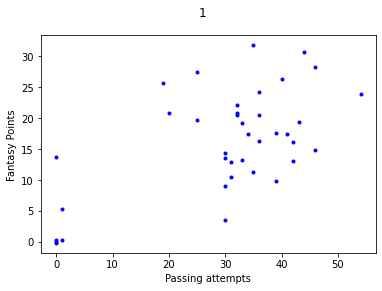

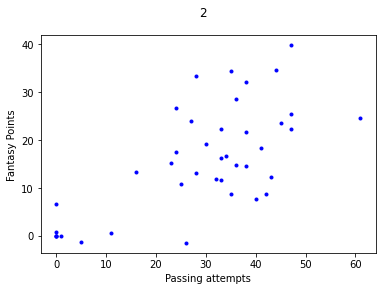

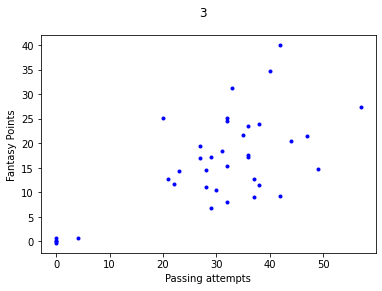

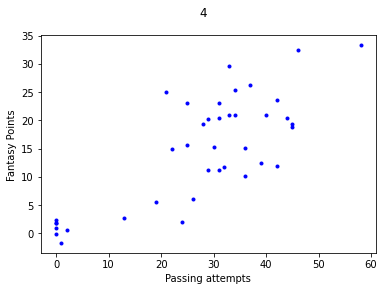

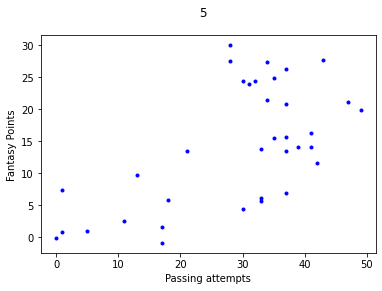

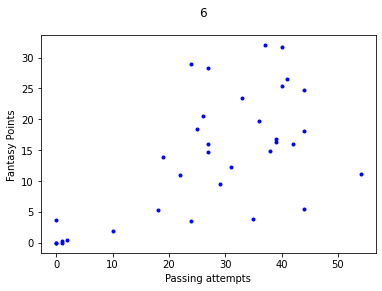

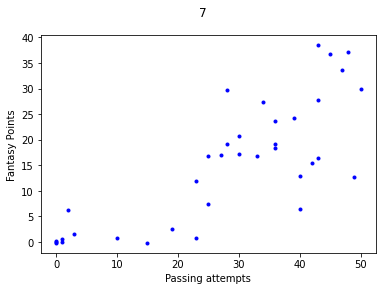

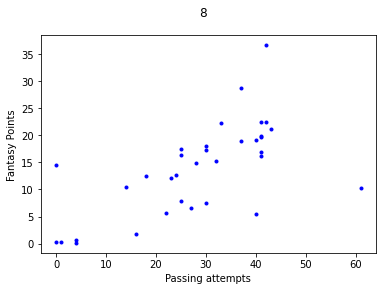

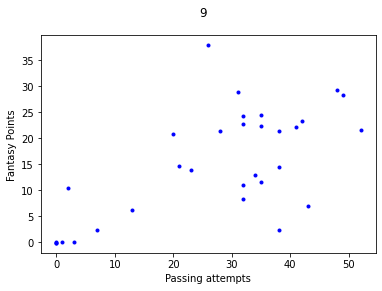

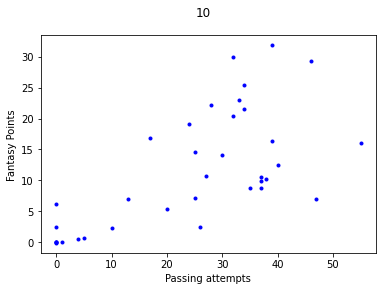

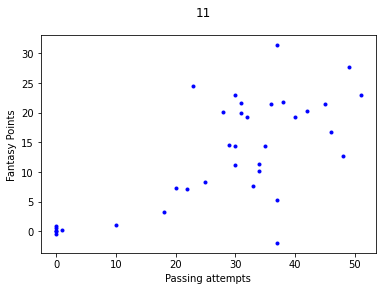

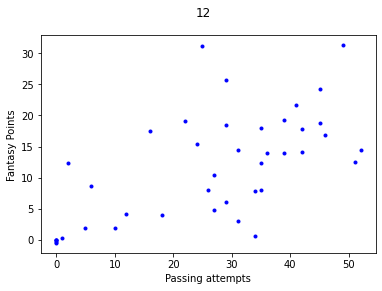

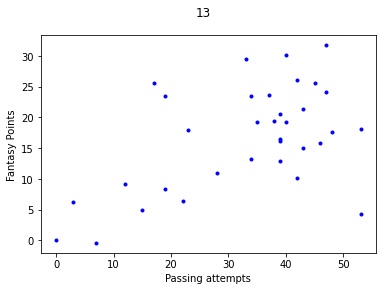

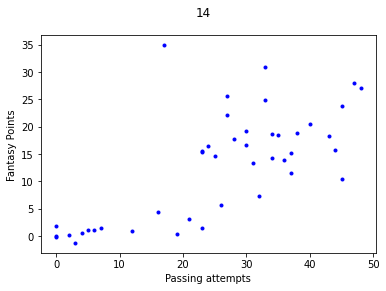

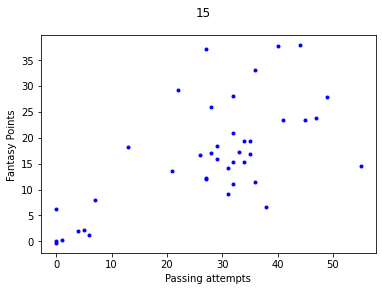

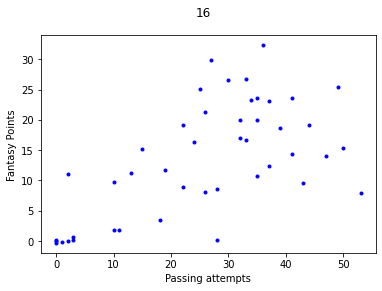

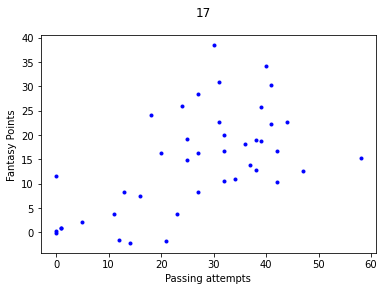

In [29]:
# PROBABLY GET RID OF
fignum = 1
for week, group in QB_week_df.groupby('Week'):
  fig = plt.figure(fignum)
  plt.plot(group['PassingAtt'], group['PPRFantasyPoints'], 'b.')
  fig.suptitle(week)
  plt.xlabel('Passing attempts')
  plt.ylabel('Fantasy Points')
  fignum += 1
plt.show()

There appears to be a slight correlation between passing attempts and fantasy points when looking on a weekly basis. So we decided to look at this on a yearly basis below.

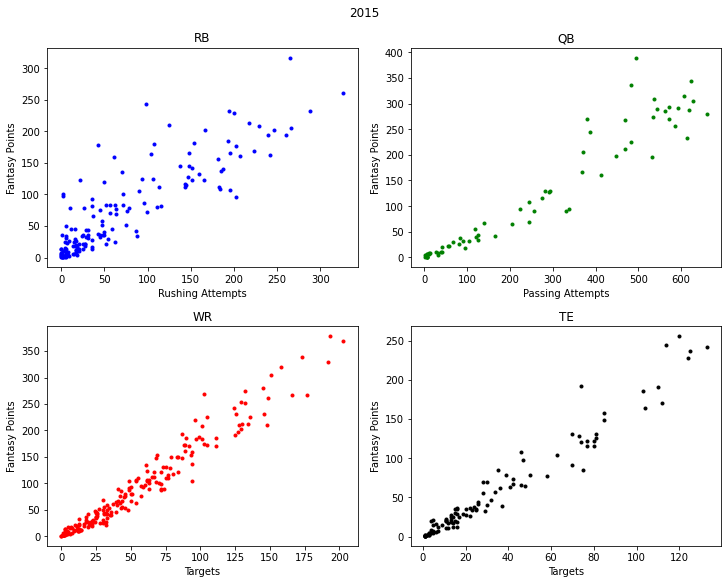

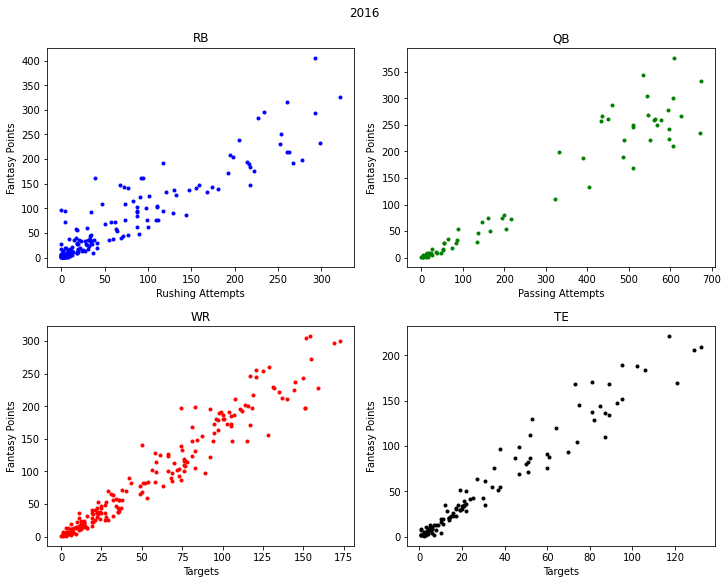

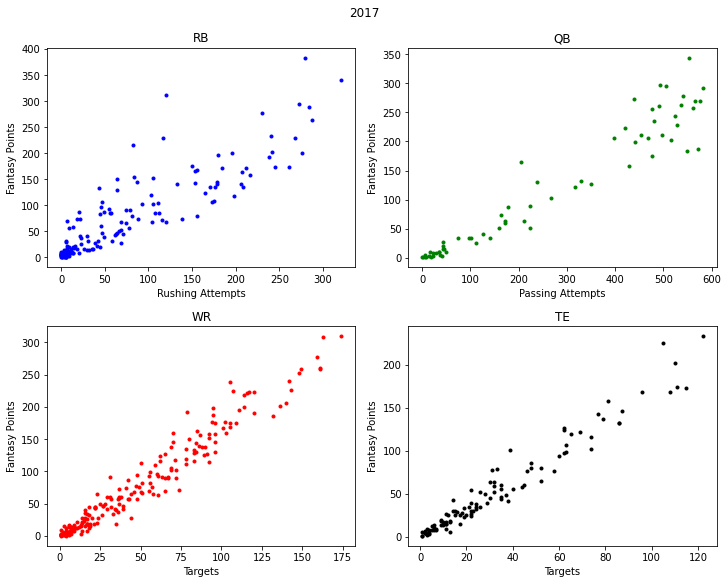

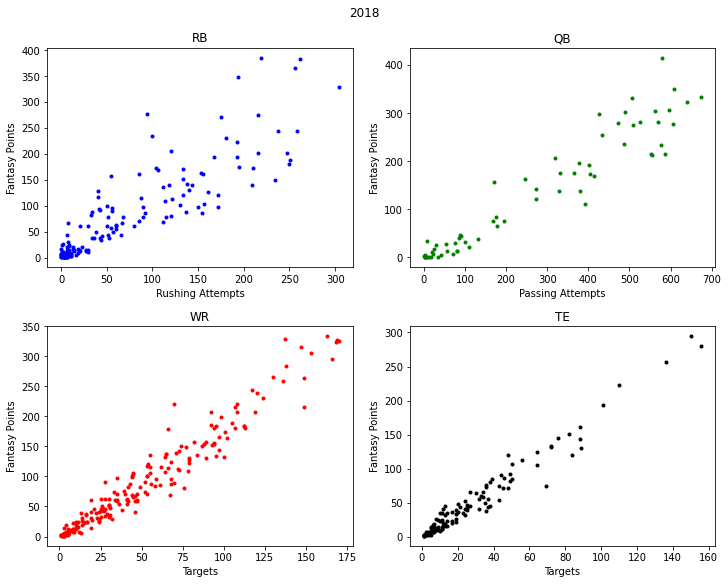

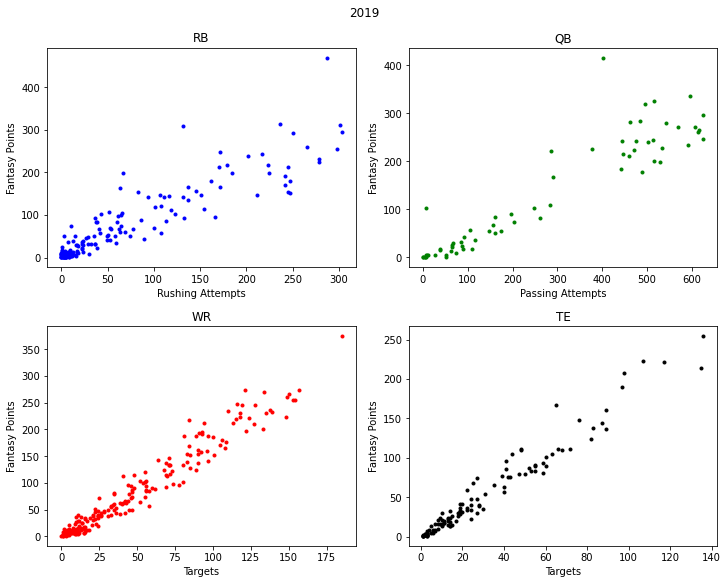

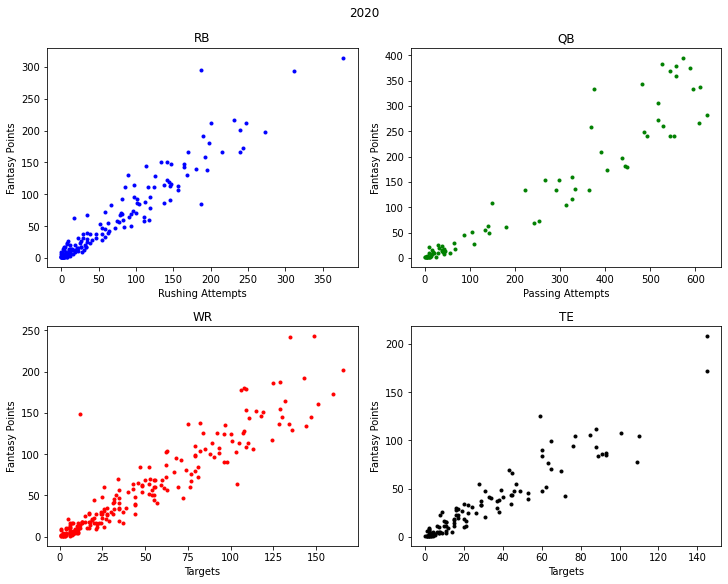

In [30]:
fignum = 1

for year in range(2015, 2021):
  year_df = get_yearly_data(year)
  # drop any row that didn't score any fantasy points
  year_df = year_df.loc[(year_df['FantasyPoints'] > 0)]
  fig, axes = plt.subplots(2, 2, constrained_layout = True)
  fig.set_size_inches(10,8)
  for idx, row in year_df.iterrows():
    if row['Pos'] == 'RB':
      axes[0, 0].plot(row['RushingAtt'], row['FantasyPoints'], 'b.') 
      axes[0, 0].set(xlabel='Rushing Attempts', ylabel='Fantasy Points')     
    elif row['Pos'] == 'QB':
      axes[0, 1].plot(row['PassingAtt'], row['FantasyPoints'], 'g.')
      axes[0, 1].set(xlabel='Passing Attempts', ylabel='Fantasy Points')
    elif row['Pos'] == 'WR':
      axes[1, 0].plot(row['Tgt'], row['FantasyPoints'], 'r.')
      axes[1, 0].set(xlabel='Targets', ylabel='Fantasy Points')
    elif row['Pos'] == 'TE':
      axes[1, 1].plot(row['Tgt'], row['FantasyPoints'], 'k.')
      axes[1, 1].set(xlabel='Targets', ylabel='Fantasy Points')

  fig.suptitle(year)
  axes[0, 0].set_title('RB')
  axes[0, 1].set_title('QB')
  axes[1, 0].set_title('WR')
  axes[1, 1].set_title('TE')

  plt.show()

Once again there is a corelation between passing attempts and fantasy points, this time a stronger corelation.This make sense because the more attempts a quaterback has to throw the ball the more chances they have to complete their passes for yards which convert are converted into fantasy points. This line of thinking leads me to believe that we should look at a players snap count because the more often a player is on the field the more likely they are to get points.

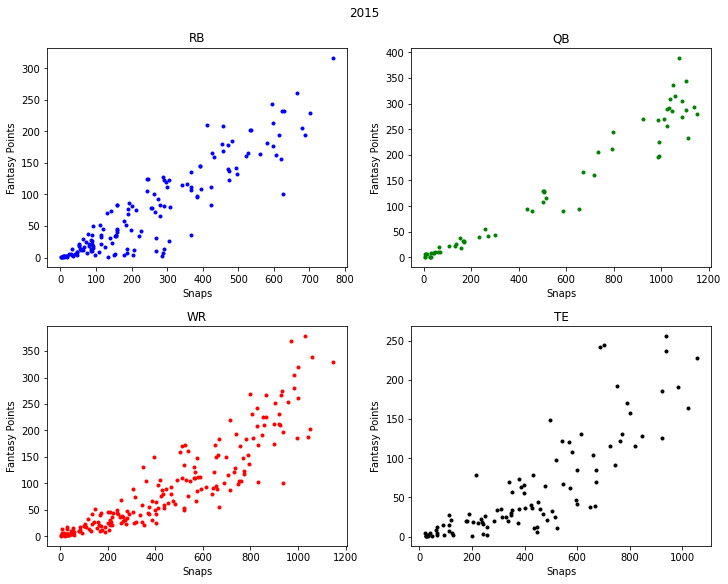

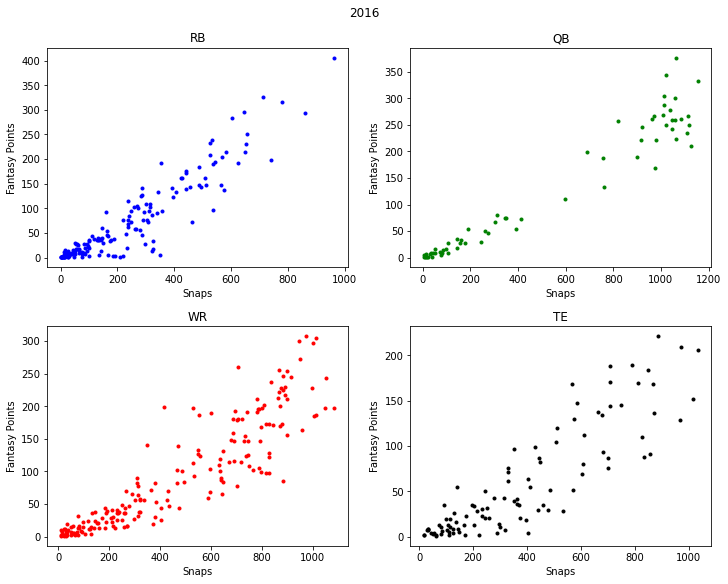

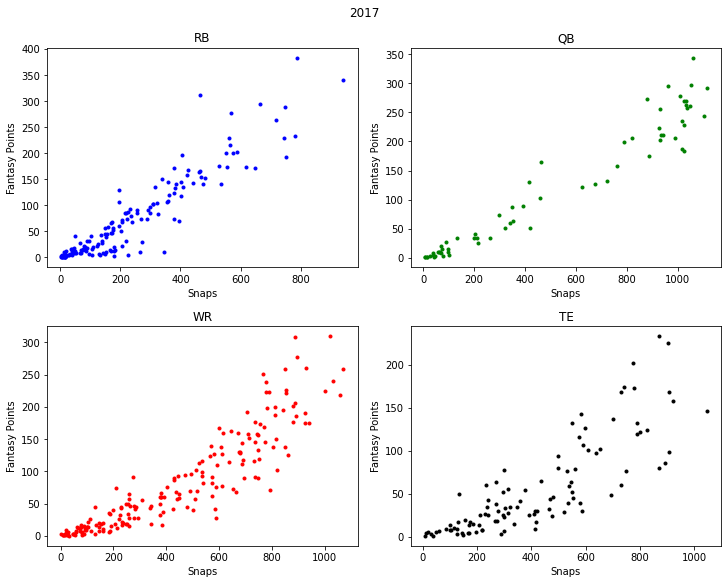

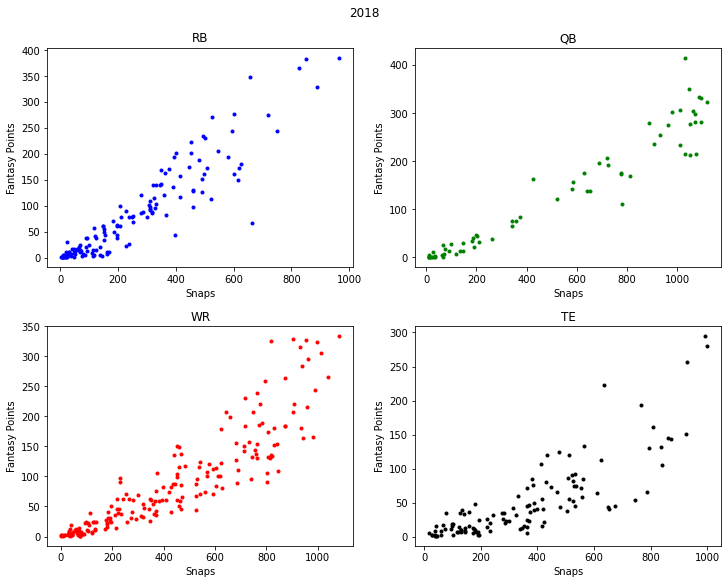

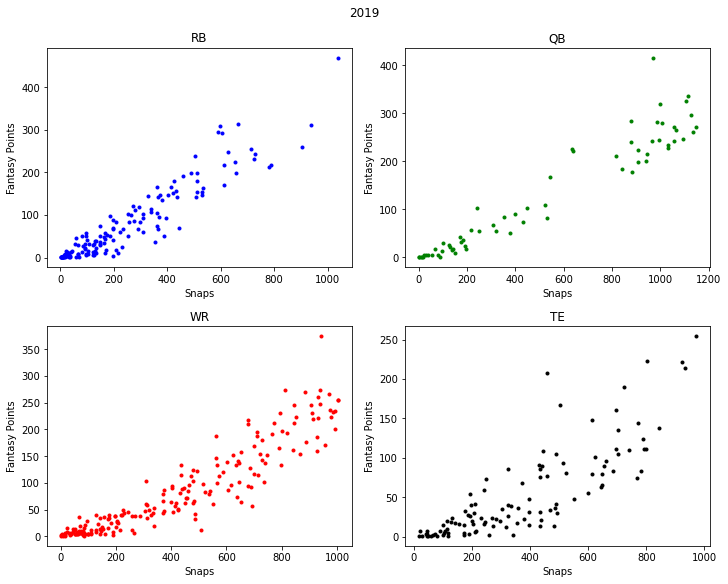

In [31]:
yearnum = 1

for year in range(2015, 2020):
  year_df = get_yearly_data(year)
  year_df = year_df.rename(columns={'Tm': 'Team'})
  year_df = year_df.loc[(year_df['FantasyPoints'] > 0)]
  
  snap_df = get_player_snapcount_by_year(year)
  snap_df = snap_df.loc[(snap_df['Off Snaps'] > 0)]

  merged_df = year_df.merge(snap_df, how='inner', on=['Player', 'Team'])
  fig, axes = plt.subplots(2, 2, constrained_layout = True)
  fig.set_size_inches(10,8)
  for idx, row in merged_df.iterrows():
    player = row['Player']
    snaps = row['Off Snaps']

    # plot the data by position
    if row['Pos_x'] == 'RB':
      color = 'b.'
      ax1 = 0
      ax2 = 0
    elif row['Pos_x'] == 'WR':
      color = 'r.'
      ax1 = 1
      ax2 = 0
    elif row['Pos_x'] == 'QB':
      color = 'g.'
      ax1 = 0
      ax2 = 1
    elif row['Pos_x'] == 'TE':
      color = 'k.'
      # fignum = yearnum + 3
      ax1 = 1
      ax2 = 1
    
    # plot the data
    axes[ax1, ax2].plot(snaps, row['FantasyPoints'], color)

  # label the figure appropriately
  fig.suptitle(year)
  axes[0, 0].set_title('RB')
  axes[0, 1].set_title('QB')
  axes[1, 0].set_title('WR')
  axes[1, 1].set_title('TE')
  for ax in axes.flat:
    ax.set(xlabel='Snaps', ylabel='Fantasy Points')
  plt.show()


As we thought there is also a strong correlation between snap count and fantasy points. We also noticed that there is often a group of data that is above 600 snaps and another one below 600 snaps this is likely because teams often have a set starting QB so unless they get hurt they usually start every offensive snap.
 This is not always true for RB and WR

Another thing that we wanted to look at was how important the opponents skill level is for a players fantasy success.


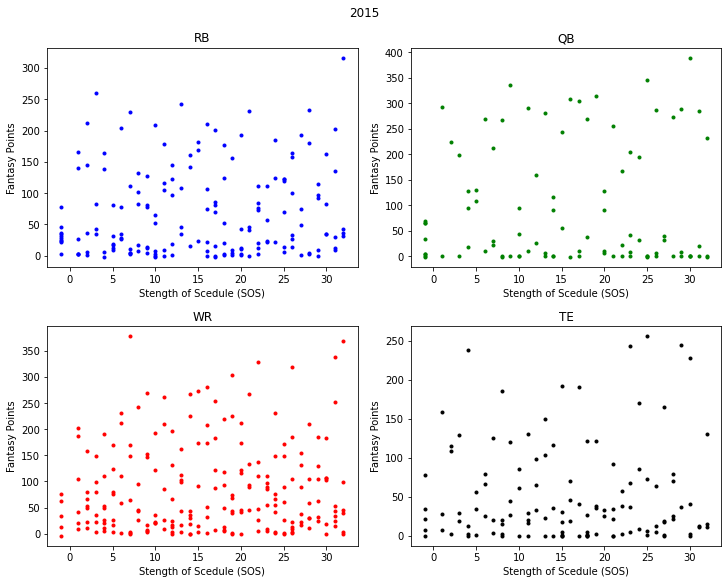

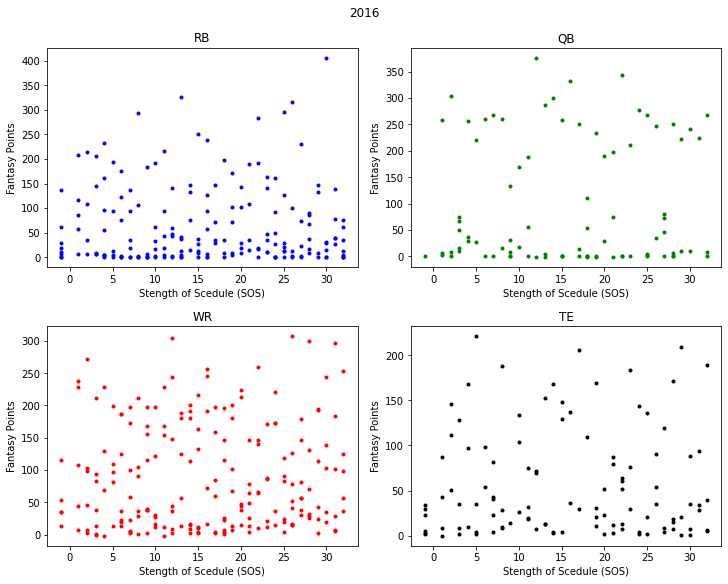

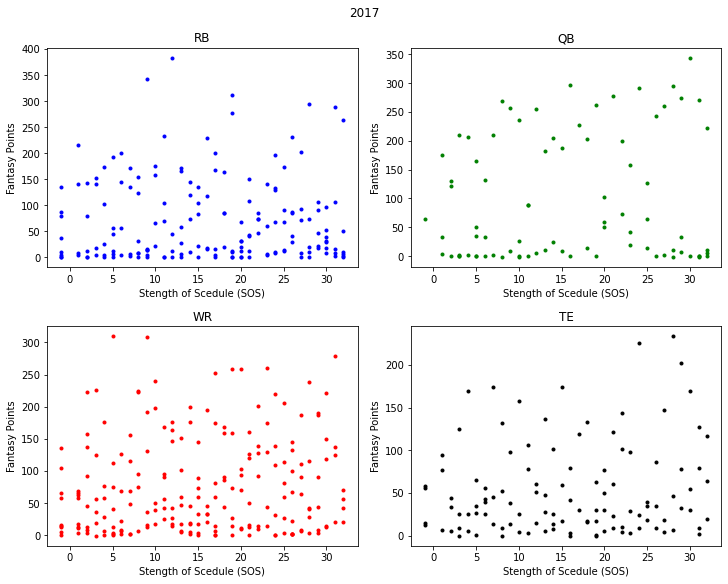

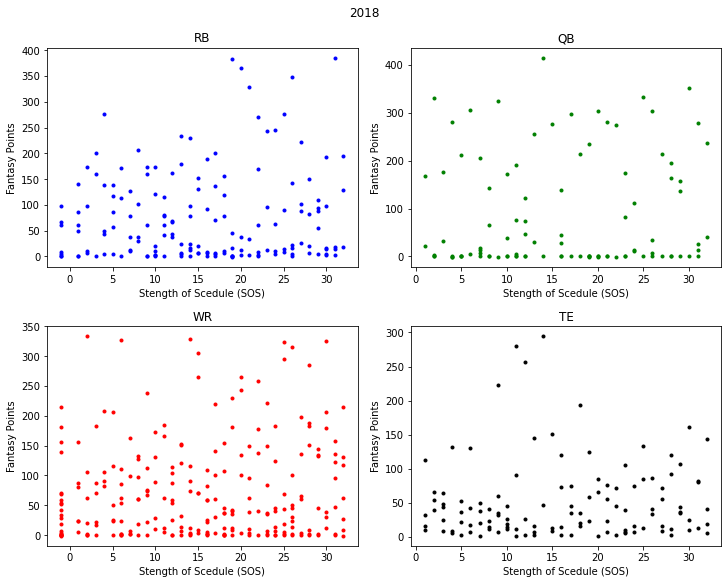

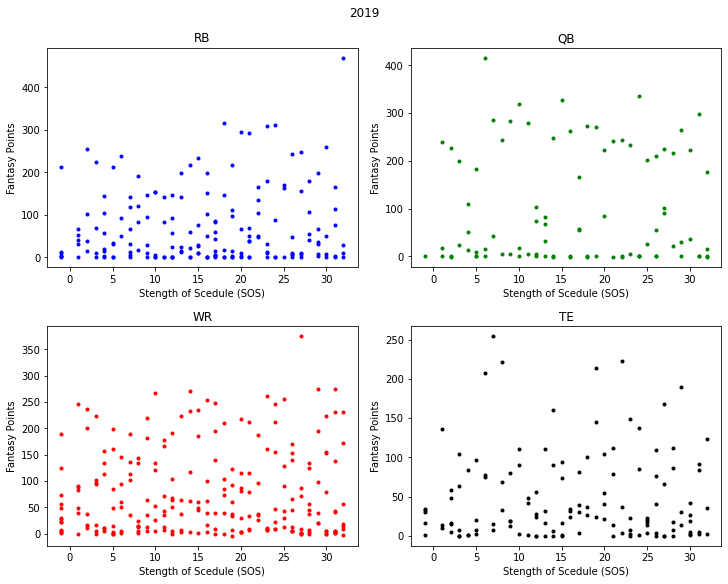

In [32]:
fignum = 1

for year in range(2015, 2020):
  # get the data for that year
  yearly_data = get_yearly_data(year)
  sos_df = get_sos_data(year)

  fig, axes = plt.subplots(2, 2, constrained_layout = True)
  fig.set_size_inches(10,8)
  for idx, row in yearly_data.iterrows():
    team_abrv = row['Tm']

    # find the SOS for the team the QB is on
    sos = -1
    for idx, sos_row in sos_df.iterrows():
      if team_abrv_dict[sos_row['Team']] == team_abrv:
        sos = sos_row['PassingSOSRank']

    # plot the data by position
    if row['Pos'] == 'RB':
      color = 'b.'
      ax1 = 0
      ax2 = 0
    elif row['Pos'] == 'WR':
      color = 'r.'
      ax1 = 1
      ax2 = 0
    elif row['Pos'] == 'QB':
      color = 'g.'
      ax1 = 0
      ax2 = 1
    elif row['Pos'] == 'TE':
      color = 'k.'
      ax1 = 1
      ax2 = 1

    axes[ax1, ax2].plot(sos, row['FantasyPoints'], color)
  
  # label the figure appropriately
  fig.suptitle(year)
  axes[0, 0].set_title('RB')
  axes[0, 1].set_title('QB')
  axes[1, 0].set_title('WR')
  axes[1, 1].set_title('TE')
  for ax in axes.flat:
    ax.set(xlabel='Stength of Scedule (SOS)', ylabel='Fantasy Points')
  plt.show()
  

Appears to have no corelation between strength of schedule and fantasy points for the QB position

In [33]:
# # Probably put in data exploration
# fignum = 1
# for year in range(2017, 2021):
#   fig, axes = plt.subplots(2, 2, constrained_layout = True)
#   fig.set_size_inches(10,8)

#   weekly_df = get_weekly_data_by_year(year)
#   weekly_df = weekly_df.loc[(weekly_df['PPRFantasyPoints'] > 0)]

#   sched_df = get_schedule_data(year)
#   defense_df = get_defensive_stats(year)

#   for idx, row in weekly_df.iterrows():

    
#     # for each player get their team and the week they are playing
#     team = row['Tm']
#     week = row['Week']
#     # get their opponent and their opponents defensive stats
#     opp_row = sched_df[(sched_df['Team'] == team) & (sched_df['Week'] == week)]
#     opp = opp_row['Opp'].values[0]
#     defensive_stats = defense_df[defense_df[('Gen Tm')] == opp]

#     # X = defensive_stats['Total Yds']

#     # plot the data by position
#     if row['Pos'] == 'RB':
#       axes[0, 0].plot(defensive_stats['Total Yds'], row['PPRFantasyPoints'], 'b.')
#     elif row['Pos'] == 'WR':
#       axes[1, 0].plot(defensive_stats['Total Yds'], row['PPRFantasyPoints'], 'r.')
#     elif row['Pos'] == 'QB':
#       axes[0, 1].plot(defensive_stats['Total Yds'], row['PPRFantasyPoints'], 'g.')
#     elif row['Pos'] == 'TE':
#       axes[1, 1].plot(defensive_stats['Total Yds'], row['PPRFantasyPoints'], 'k.')
  
#   # label the figure appropriately
#   fig.suptitle('Week ' + str(week) + ' ' + str(year))
#   axes[0, 0].set_title('RB')
#   axes[0, 1].set_title('QB')
#   axes[1, 0].set_title('WR')
#   axes[1, 1].set_title('TE')
#   for ax in axes.flat:
#     ax.set(xlabel='Total Yards allowed by Opponents Defense', ylabel='Fantasy Points')
#   plt.show()

In fantasy football, a player's average draft position (ADP) refers to the average position in which they were taken from a large sample of draft data. This is a good metric to describe the projected value of a player on draft day. But how well does this correspond to actual performance? This is something we want to find out.

We will start by defining the ratio between a player's actual fantasy points and expected fantasy points. If this number is greater than 1, that player exceeded their expected fantasy points for the season. If it is less than 1, that player scored less points than they were projected. On draft day, we only know the expected points of each player. Let's see if we can find any patterns in the data by plotting this ratio over multiple seasons.

Another related metric could be to compare a player's average draft position (ADP) with their ranking at the end of each season. ADP is directly proportional to the season total of fantasy points expected for each player, so this would be another interesting way to compare a player's expected and actual performance. Let's plot each player's draft position (based on ADP) vs. the fantasy points they had at the end of the season.

Let's make a prediction first. We should expect a player who is drafted earlier to get more fantasy points that season, right? So we predict a negative correlation between draft position and fantasy points. That is, as draft position increases, total fantasy points should decrease. <br>
***Takeaway # : Make predictions about the data before we plot! That way, we can compare actual results to our expected results and think about why they might be different!***

In [34]:
year_df = get_yearly_data(2020)
year_df

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,OTI,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Andre Roberts,BUF,WR,32,15,0,5,4,0,0,0,-3,0,1,34,0,-1.0,0,3,2
622,Nate Sudfeld,PHI,QB,27,1,0,0,0,32,0,12,12,0,2,0,0,-2.0,1,1,1
623,Nsimba Webster,RAM,NaN,24,16,0,0,0,0,0,0,0,0,0,0,0,-2.0,0,3,1
624,Dede Westbrook,JAX,WR,27,2,0,1,1,0,0,0,0,0,0,4,0,-2.0,0,1,1


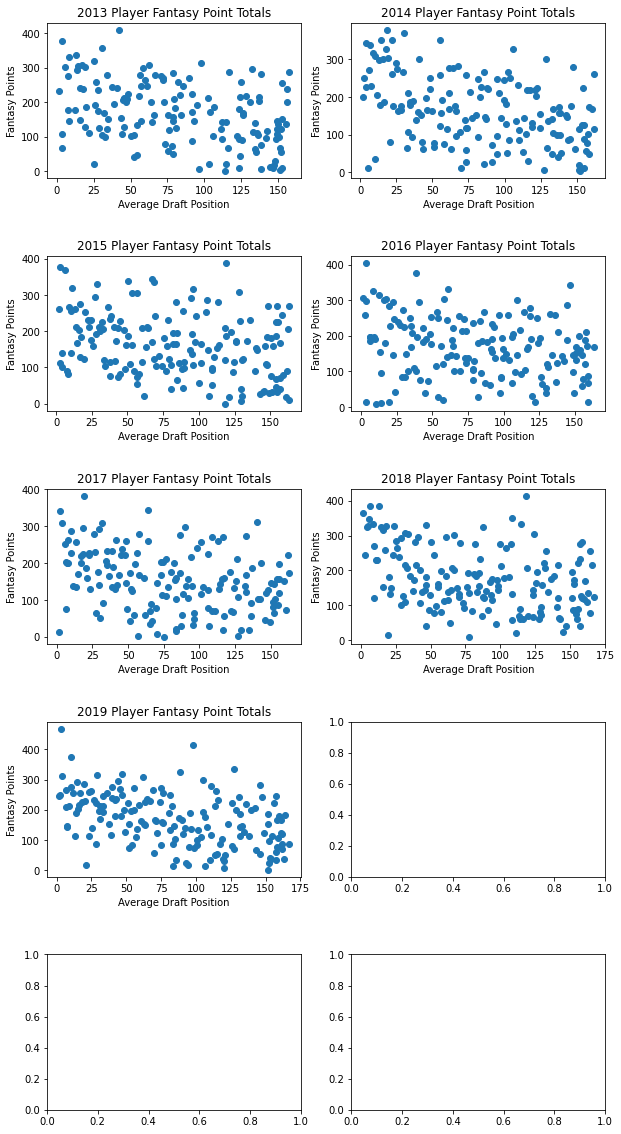

In [52]:
all_years_df = []
fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(10,20), constrained_layout = True)
plt.subplots_adjust(hspace=0.5)
for year, ax in zip(range(2013, 2020),axs.ravel()):
  adp_df = get_adp_by_year(year)
  year_df = get_yearly_data(year)
  year_df.rename(columns={'Tm':'Team'},inplace=True)
  
  # clean the data so that all the names match up
  adp_df.Player[adp_df.Player == 'Joshua Cribbs'] = 'Josh Cribs'
  adp_df.Player[adp_df.Player == 'Robert Griffin III'] = 'Robert Griffin'
  adp_df.Player[adp_df.Player == 'LeVeon Bell'] = 'Le\'Veon Bell'
  adp_df.Player[adp_df.Player == 'CJ Anderson'] = 'C.J. Anderson'
  adp_df.Player[adp_df.Player == 'TJ Yeldon'] = 'T.J. Yeldon'
  adp_df.Player[adp_df.Player == 'Ted Ginn Jr'] = 'Ted Ginn'
  adp_df.Player[adp_df.Player == 'Rob Kelley'] = 'Robert Kelley'
  adp_df.Player[adp_df.Player == 'CJ Prosise'] = 'C.J. Prosise'
  adp_df.Player[adp_df.Player == 'Ronald Jones II'] = 'Ronald Jones'
  adp_df.Player[adp_df.Player == 'Mitch Trubisky'] = 'Mitchell Trubisky'
  adp_df.Player[adp_df.Player == 'Odell Beckham Jr'] = 'Odell Beckham'

  if year == 2020:
    adp_df.Player[adp_df.Player == 'A.J. Dillon'] = 'AJ Dillon'
    adp_df.Player[adp_df.Player == 'Odell Beckham Jr'] = 'Odell Beckham Jr.'
    adp_df.Player[adp_df.Player == 'D.J. Chark'] = 'DJ Chark'
    adp_df.Player[adp_df.Player == 'Chris Herndon IV'] = 'Chris Herndon'
    adp_df.Player[adp_df.Player == 'Gardner Minshew'] = 'Gardner Minshew II'
    adp_df.Player[adp_df.Player == 'Ronald Jones'] = 'Ronald Jones II'

  # merge the data frames
  year_df = year_df.merge(adp_df, on=['Player'], how='inner')

  # save the merged dataframe in a list
  all_years_df.append(year_df)

  # plot the data
  ax.scatter(year_df['Overall'],year_df['FantasyPoints'])
  ax.set_xlabel('Average Draft Position')
  ax.set_ylabel('Fantasy Points')
  ax.set_title(str(year) + ' Player Fantasy Point Totals')
plt.show()

Our expected result was a decreasing linear correlation. That is, as a player's draft position increases, their total fantasy points should decrease. However, since a player's draft position is based on a player's *predicted* season totals, we know that we will not see a perfect correlation. Let's fit a linear model to this data and see if there is a correlation between draft position and fantasy points.

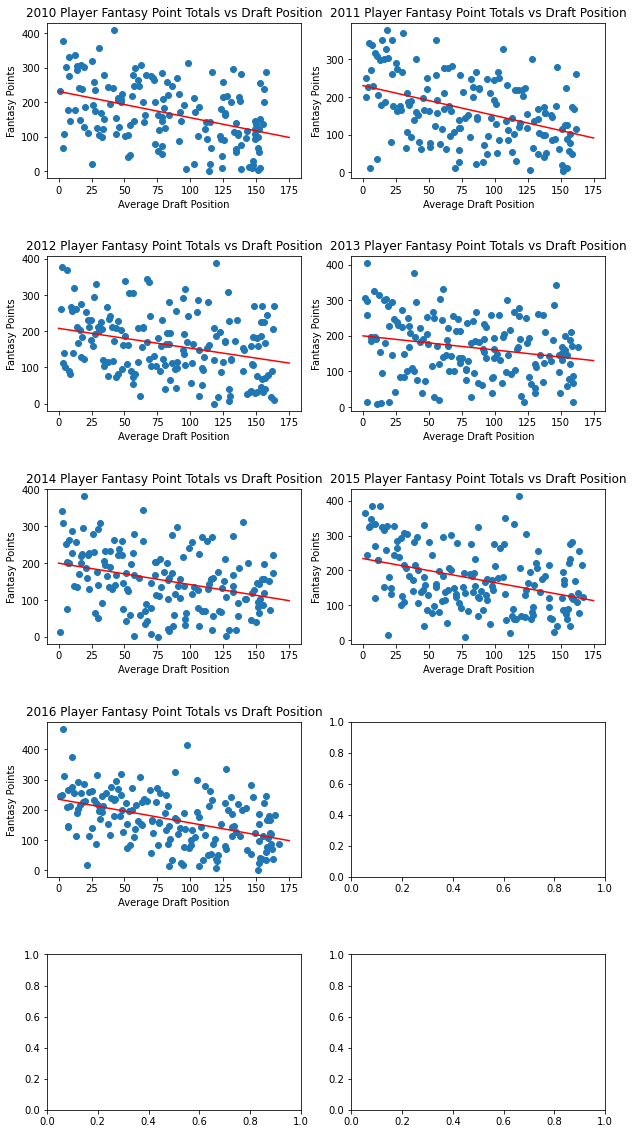

In [53]:
fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(10,20), constrained_layout = True)
plt.subplots_adjust(hspace=0.5)
for year, year_df, ax in zip(range(2010, 2021),all_years_df,axs.ravel()):
  ax.scatter(year_df['Overall'], year_df['FantasyPoints'])
  ax.set_xlabel('Average Draft Position')
  ax.set_ylabel('Fantasy Points')
  ax.set_title(str(year) + ' Player Fantasy Point Totals vs Draft Position')
  

  #Add linear regression line
  b,a = np.polyfit(list(year_df['Overall']),list(year_df['FantasyPoints']),deg=1)
  x_seq = np.linspace(0, 175, 176)
  ax.plot(x_seq,a+b*x_seq,color='red')
plt.show()

We do indeed see a negative correlation between draft position an fantasy points, as expected. What does this mean for the average fantasy player? After all, the purpose of using data science is to help make predictions about player performance! Specifically, we as fantasy players are interested in the players which fall *above* the regression line. These are the players who performed better than the model suggested!

Now we have determined that we want to focus on players who fall above the regression line. The next step is to dive in and determine what makes a player fall above that line. It is important at this stage to think about the data we have at our disposal to draw insight from.

***Takeaway # : Think about other aspects of data we have which can help to explain trends!***

One of the datasets we have at our disposal is the snap count for each player for the entire season. A "snap" in football refers to the play. Certain players aren't on the field for every play; hence, their "snap percentage" would be a ratio between the number of plays they are on the field for and the total number of plays ran by the team. This could be a very useful metric to analyze; after all, the more a player is on the field, the more likely they are to be involved in more plays and score more points, right? Let's take a look at this in the dataset below.

In [54]:
snap_df = get_snap_FDP(2020)
snap_df.rename(columns={'Name':'Player'},inplace=True)
snap_df

,Pos,Team,Player,G,Snaps,TeamSnaps,Snap%,Per Game,RushPerc,TargetP,TouchPerc,FP,FPPerSnap
0,WR,BUF,Stefon Diggs,19,1136,1277,88.96,59.79,0.09,17.43,17.52,244.70,0.22
1,WR,LAR,Robert Woods,18,1124,1246,90.21,62.44,2.22,13.17,15.39,170.40,0.15
2,WR,TB,Mike Evans,20,1092,1352,80.77,54.60,0.00,12.00,12.00,211.00,0.19
3,TE,KC,Travis Kelce,18,1088,1257,86.56,60.44,0.00,17.19,17.19,261.76,0.24
4,WR,KC,Tyreek Hill,18,1085,1257,86.32,60.28,1.57,15.21,16.77,278.80,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,RB,WAS,Mike Warren,1,2,80,2.50,2.00,0.00,0.00,0.00,0.00,0.00
558,WR,MIA,Kirk Merritt,1,1,61,1.64,1.00,0.00,0.00,0.00,0.00,0.00
559,WR,NYG,Alex Bachman,1,1,60,1.67,1.00,0.00,0.00,0.00,0.00,0.00
560,RB,JAX,Nathan Cottrell,8,1,493,0.20,0.13,0.00,0.00,0.00,0.00,0.00


What if we began by looking at only the players who were above the regression line we generated previously? After all, these are the players we want to draft. There is a simple way to determine which players are above and below each regression line. We simply compute the difference between their expected and actual fantasy points, and determine if this value is positive or negative.

In [55]:
#Function to determine if a player's performance is above or below the regression line
def is_above_regression(x,y,a,b):
  y_predict = a + b*x
  if y > y_predict:
    return True
  return False

In [56]:
above_list = []
below_list = []
for year_df in all_years_df:
  #Apply this function to our DataFrame
  above_index_list = []
  below_index_list = []
  index = 0

  for i, row in year_df.iterrows():
    if is_above_regression(row['Overall'],row['FantasyPoints'],a,b):
      above_index_list.append(index)
    else:
      below_index_list.append(index)
    index += 1

  above_df = year_df.iloc[above_index_list]
  below_df = year_df.iloc[below_index_list]

  above_list.append(above_df)
  below_list.append(below_df)

We have split the original DataFrame in two: One contains players who were above the regression line, and the other contains players who were below. Let's begin by comparing the total number of snaps between each group of players and see if we can gain any insight.

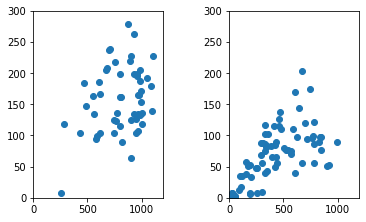

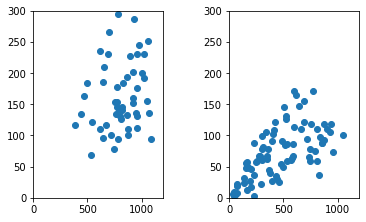

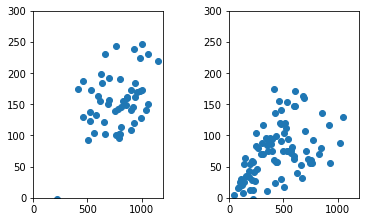

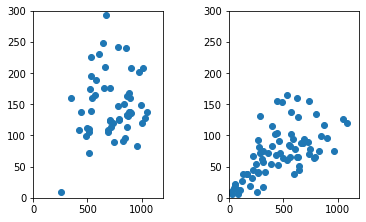

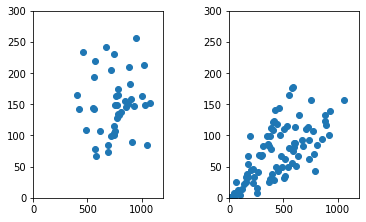

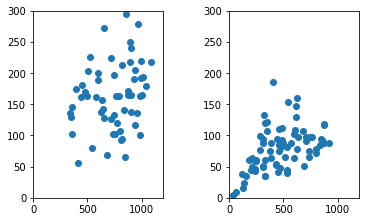

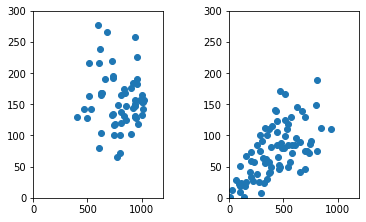

In [57]:
year = 2013
for idx in range(7):
  snap_df = snap_df = get_snap_FDP(year + idx)
  snap_df.rename(columns={'Name':'Player'},inplace=True)

  above_df = above_list[idx]
  below_df = below_list[idx]

  above_df_merge = above_df.merge(snap_df,how='left',on='Player')
  below_df_merge = below_df.merge(snap_df,how='left',on='Player')
  above_df_merge.head()

  plt.subplot(1,2,1)
  plt.scatter(above_df_merge['Snaps'],above_df_merge['FP'])
  plt.xlim(0,1200)
  plt.ylim(0,300)

  plt.subplot(1,2,2)
  plt.scatter(below_df_merge['Snaps'],below_df_merge['FP'])
  plt.xlim(0,1200)
  plt.ylim(0,300)

  plt.tight_layout(4)
  plt.show()

## Part 4: Hypothesis Testing

***Takeaway #2: Generalize, generalize, generalize! Being able to predict the performance of a single player is helpful, but it is not our objective. We want to develop models that allow us to predict performance for any given player.***

From our exploratory data analysis, we were able to determine that we want to focus on players who consistently are above the regression line between Average Draft Position and total fantasy points. These players are the ones who we want to draft in the following season, because they consistently outperform expectations. <br>
***Takeaway # : Use the insights gained from exploratory data analysis to narrow down your objective!***

At this point, we should determine a specific metric to use to evaluate player performance which relates to our analysis up to this point. One thing which we haven't discussed up to this point is measuring *distance* from the regression line. In statistics, the distance from the actual value to the expected value is known as a *residual*. Residuals can be positive or negative, and can tell us how good of a predictor our model is. In this case, residual values will tell us how much an individual player exceeds or does not exceed expectations.

To this end, we will develop a metric which is the normalized sum of a player's residual value between ADP and total fantasy points across a certain number of seasons. Normalizing in statistics means adjusting values to be on a common scale. In this case, we will divide the sum of residuals by the number of seasons they have played. This is important because we want to be able to judge players who have played for a long time and those who are new to the NFL in a similar manner.

In [64]:
#Add columns in our dataframe for "Predicted Fantasy Points" and "Residual Value"
prediction_df_list = []
for year_df in all_years_df:
  year_df = year_df.assign(FP_Predict = lambda x: (a + b*x['Overall']))
  year_df = year_df.assign(Resid = lambda x: (x['FantasyPoints'] - x['FP_Predict']))
  prediction_df_list.append(year_df)
  

In [88]:
prediction_df = pd.concat(prediction_df_list)
names = []
norms = []
# positions = []
for player, group in prediction_df.groupby('Player'):
  sum_of_resid = group['Resid'].agg(np.sum)
  length = len(group)
  norm_sum_of_resid = sum_of_resid/length

  names.append(player)
  norms.append(norm_sum_of_resid)
  # positions.append(postition)
value_df = pd.DataFrame(list(zip(names, norms)), columns =['Name', 'Residuals'])  
value_df.sort_values('Residuals', ascending=False)

,Name,Residuals
249,Lamar Jackson,257.252462
306,Patrick Mahomes,168.971970
91,Dak Prescott,162.869291
209,Josh Allen,161.926087
76,Christian McCaffrey,136.285321
...,...,...
406,Zac Stacy,-144.972454
307,Paul Perkins,-147.961759
398,Vick Ballard,-152.568458
66,Charles Johnson,-164.955141


## Part 5: Conclusion and Discussion of Insights

There are a variety of metrics to evaluate player performance in fantasy football.